# Computer Vision - Histogram Equalization

### Mesyella - 2201793281

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

### 1. Library openCV

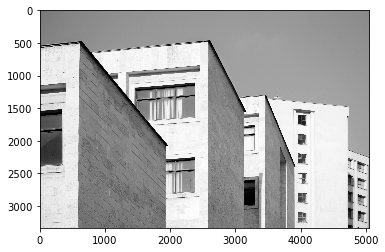

In [2]:
img= cv2.imread('foto.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')

### Histogram

In [3]:
height = img.shape[0]
width = img.shape[1]
intensity = np.zeros(256)
for i in range(height):
    for j in range(width):
        intensity[img[i][j]] += 1

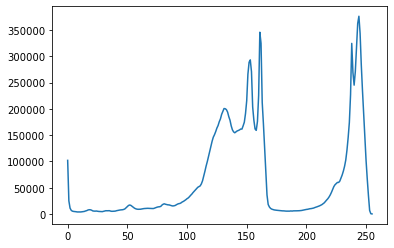

In [4]:
plt.plot(intensity)
plt.show()

### Histogram equalization

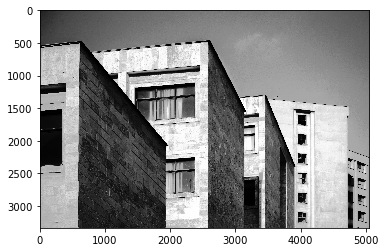

In [5]:
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap = 'gray')

### Histogram after equalization

In [6]:
equHeight = equ.shape[0]
equWidth = equ.shape[1]
equIntensity = np.zeros(256)
for i in range(equHeight):
    for j in range(equWidth):
        equIntensity[equ[i][j]] += 1

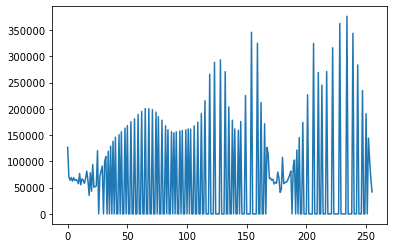

In [7]:
plt.plot(equIntensity)
plt.show()

### 2. Library openCV

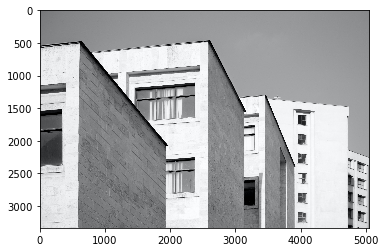

In [8]:
image = Image.open('foto.jpg')
plt.imshow(image, cmap = 'gray')
image = np.asarray(image)
flat = image.flatten()

### Histogram

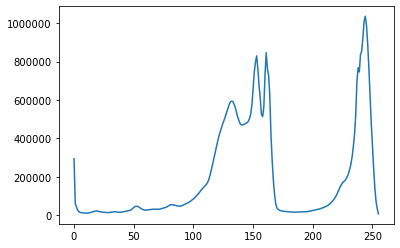

In [9]:
def histogram(image):
    hist = np.zeros(256)
    for pixel in image:
        hist[pixel] +=1
    return hist

histo = histogram(flat)
plt.plot(histo)

### Cumulative sum

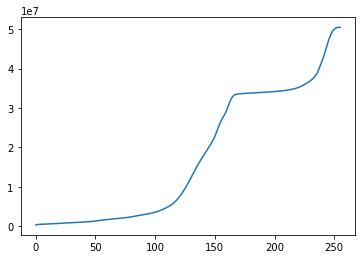

In [10]:
def cumulative(x):
    x = iter(x)
    y = [next(x)]
    for i in x:
        y.append(y[-1]+i)
    return np.array(y)

cum = cumulative(histo)
plt.plot(cum)

### Normalize to range 0-255

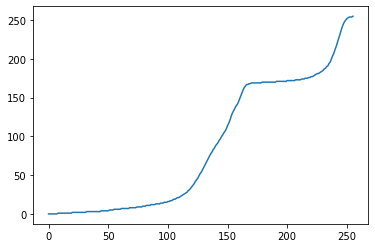

In [11]:
num = (cum - cum.min())*255
n = cum.max() - cum.min()
cum = num / n
cum= cum.astype('uint8')
plt.plot(cum)

### Result after equalization

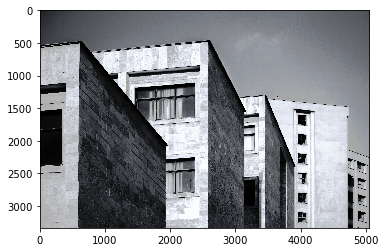

In [12]:
equalized = cum[flat]
equalized = np.reshape(equalized, image.shape)
plt.imshow(equalized, cmap='gray')

### Histogram after equalization

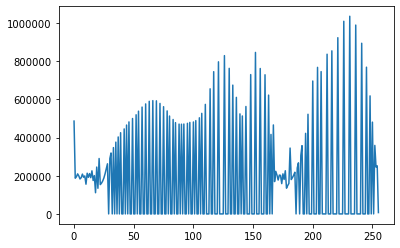

In [13]:
plt.plot(histogram(cum[flat]))

## Comparison between using library and scratch

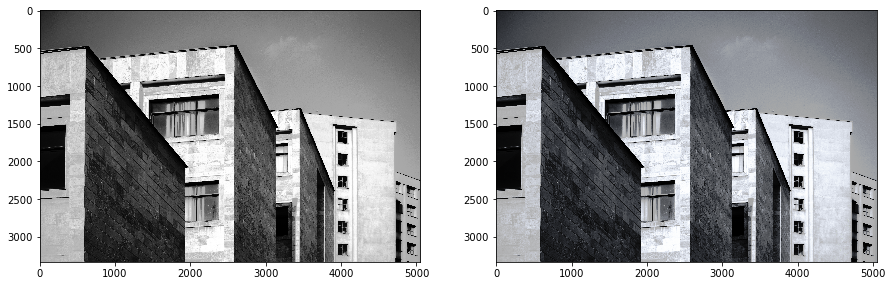

In [14]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(equ, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.show(block=True)

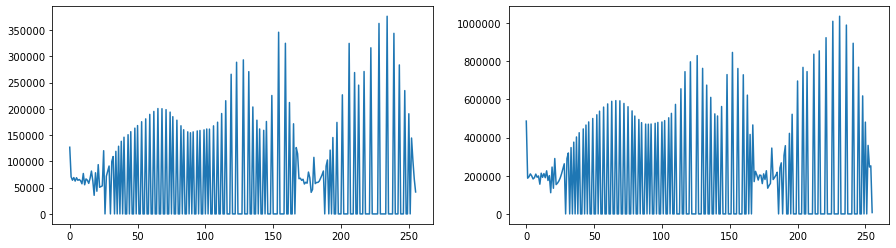

In [15]:
fig = plt.figure()
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.plot(equIntensity)
fig.add_subplot(1,2,2)
plt.plot(histogram(cum[flat]))
plt.show(block=True)

it shows that the result is slightly different